<a href="https://colab.research.google.com/github/KaptanKaraSakal/MachineLearningExamples/blob/master/gymExamplesFrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Winter is here. You and your friends were tossing around a frisbee at the
    park when you made a wild throw that left the frisbee out in the middle of
    the lake. The water is mostly frozen, but there are a few holes where the
    ice has melted. If you step into one of those holes, you'll fall into the
    freezing water. At this time, there's an international frisbee shortage, so
    it's absolutely imperative that you navigate across the lake and retrieve
    the disc. However, the ice is slippery, so you won't always move in the
    direction you intend.
    The surface is described using a grid like the following
        SFFF
        FHFH
        FFFH
        HFFG
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located
    The episode ends when you reach the goal or fall in a hole.
    You receive a reward of 1 if you reach the goal, and zero otherwise.
    """

In [ ]:
import gym
import time
import numpy as np
import random
import matplotlib.pyplot as plt

SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)

In [ ]:
env = gym.make("FrozenLake-v0",  is_slippery=False).env
env.render()


SFFF
FHFH
FFFH
HFFG


* LEFT = 0
* DOWN = 1
* RIGHT = 2
* UP = 3

In [ ]:
#Q Table
no_state = env.observation_space.n
no_action = env.action_space.n

print("State: {}, Action: {}".format(no_state, no_action))

q_table = np.zeros([no_state, no_action])

State: 16, Action: 4


In [ ]:
#Hyper Parameter
episode_number = 2000
alpha = 0.1 #learning rate
gama = 0.9 #discount rate
epsilon = 0.1 #%10 random %90 exploit

In [ ]:
#Plotting Metrics
reward_list =  []

In [ ]:
for i in range(1,episode_number):
  state = env.reset()
  current_reward = 0
  while True:
    #exploit or explore (choose action)
    if random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[state])
    
    #perform action (and get reward)
    next_state, reward, done, _ = env.step(action)

    #q learnig function
    old_value = q_table[state, action]
    next_max = np.max(q_table[next_state])

    next_value = (1-alpha) * old_value + alpha * (reward + gama * next_max)

    #q table update
    q_table[state, action] = next_value

    #state update
    state = next_state
    if done:
      break
    
  current_reward += reward
  reward_list.append(current_reward)
  #print("Episode: {}\nReward: {}\n".format(i,current_reward))

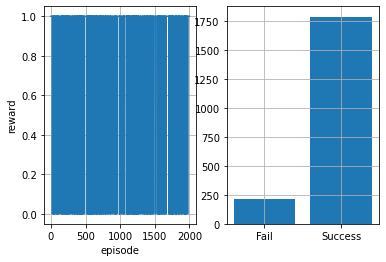

In [ ]:
fail = 0
success = 0

for i in reward_list:
  if i == 0:
    fail += 1
  else:
    success += 1

objects = ('Fail', 'Success')
y_pos = np.arange(len(objects))
performance = [fail, success]



#visualize
fig, axs = plt.subplots(1,2)
axs[0].plot(reward_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")
axs[0].grid(True)
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
axs[1].grid(True)